In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)



# hyperparameters
training_epochs = 15
batch_size = 100

# MNIST dataset

mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)

#이때 DataLoader에는 4개의 인자가 있습니다. 첫번째 인자인 dataset은 로드할 대상을 의미하며, 두번째 인자인 batch_size는 배치 크기,
#  shuffle은 매 에포크마다 미니 배치를 셔플할 것인지의 여부, drop_last는 마지막 배치를 버릴 것인지를 의미합니다.

#dataset loader
data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

# define cost/Loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to('cuda') #내부적으로 소프트맥스 함수를 포함하고 있음.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X=X.view(-1, 28 * 28).to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print("Epoch: ", "%04d" % (epoch+1), "cost =", "{:.9f}".format(avg_cost))
print('learning finished')

# Test the model using test sets

with torch.no_grad():
    X_test = mnist_test.test_data.view(-1,28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1)==Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

Epoch:  0001 cost = 0.535150588
Epoch:  0002 cost = 0.359577745
Epoch:  0003 cost = 0.331264228
Epoch:  0004 cost = 0.316404670
Epoch:  0005 cost = 0.307107002
Epoch:  0006 cost = 0.300456524
Epoch:  0007 cost = 0.294933408
Epoch:  0008 cost = 0.290956199
Epoch:  0009 cost = 0.287074059
Epoch:  0010 cost = 0.284515619
Epoch:  0011 cost = 0.281914055
Epoch:  0012 cost = 0.279526860
Epoch:  0013 cost = 0.277636617
Epoch:  0014 cost = 0.275874794
Epoch:  0015 cost = 0.274422735
learning finished
Accuracy:  0.8883000016212463


c:\ProgramData\Anaconda3\envs\YR\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\ProgramData\Anaconda3\envs\YR\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


<span style="color:orange">Visualization</span>

Label:  8
Prediction:  3


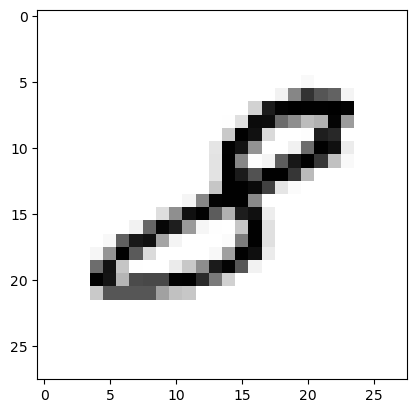

In [3]:
import matplotlib.pyplot as plt
import random

r=random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r+1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r+1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = linear(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
plt.show()